# Code Testing:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn==0.1.0
!pip install tensorflow==2.3.1
!pip install keras==2.4.3
!pip install keras-vggface==0.6
!pip install keras_applications==1.0.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: gast
    Found exi

In [ ]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from mtcnn import MTCNN
from PIL import Image


In [ ]:
feature_list = np.array(pickle.load(open('/content/embedding.pkl','rb')))
filenames = pickle.load(open('/content/filenames.pkl','rb'))

In [ ]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

94699520/94694792 [==============================] - 7s 0us/step


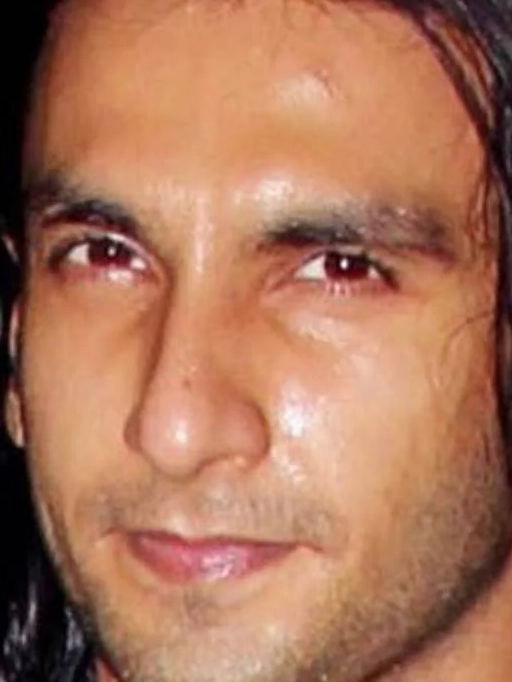

In [ ]:
detector = MTCNN()

# load image---face detection..
from google.colab.patches import cv2_imshow

sample_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sample_picturs/ranveer_singh.webp')
results = detector.detect_faces(sample_img)
x,y,width,height = results[0]['box']
face = sample_img[y:y+height,x:x+width]

cv2_imshow(face)


In [ ]:
# extract its features..

image = Image.fromarray(face)
image = image.resize((224,224))

face_array = np.asarray(image)

face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()
print(result)
print(result.shape)

[ 0.44430706  0.36611167 10.827412   ...  7.6645126   1.9738171
  0.92871773]
(2048,)


In [ ]:
# find the cosine distance ofcurrent image with all the features..

similarity = []
for i in range(len(feature_list)):
  similarity.append(cosine_similarity(result.reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])

print(len(similarity))


8555


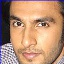

In [ ]:
# recommended image...

from google.colab.patches import cv2_imshow

index_pos = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])[0][0]

temp_img = cv2.imread(filenames[index_pos])
cv2_imshow(temp_img)


As we see that we are given the Ranveer picture and it also recommended the same image. So our code is working fine.